** This is an example of analysis on 6 oil company stocks. I am still adding more contents to it. Potentially more indictors can be added for technical analysis but only moving average is coded here for demo purpose. **

In [1]:
#!pip install pandas-datareader

In [2]:
import pandas as pd
from pandas_datareader import data,wb
import numpy as np
import datetime

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Get stock prices history for 6 oil companies over the time period from 2007/06/01 to 2017/06/01 **

In [4]:
date_start = datetime.datetime(2007,6,1)
date_end = datetime.datetime(2017,6,1)
# Suncor
SU = data.DataReader("su",data_source='google',start=date_start,end=date_end)
# Chevron
CVX = data.DataReader("cvx",data_source='google',start=date_start,end=date_end)
# Apache
APA = data.DataReader("apa",data_source='google',start=date_start,end=date_end)
# Devon
DVN = data.DataReader("dvn",data_source='google',start=date_start,end=date_end)
# Conoco Phillips
COP = data.DataReader("cop",data_source='google',start=date_start,end=date_end)
# Statoil
STO = data.DataReader("sto",data_source='google',start=date_start,end=date_end)

In [5]:
tickers =['SU','CVX','APA','DVN','COP','STO']
company_names = ['Suncor','Chevron','Apache','Devon','ConocoPhillips','Statoil']

In [6]:
oil_stocks = pd.concat([SU,CVX,APA,DVN,COP,STO],axis=1,keys=tickers)
oil_stocks.columns.names = ['Stock ticker','Stock info']

In [7]:
oil_stocks.tail()

Stock ticker     SU                                   CVX                  \
Stock info     Open   High    Low  Close   Volume    Open    High     Low   
Date                                                                        
2017-05-25    31.73  32.11  31.18  31.29  2914434  106.10  106.71  104.72   
2017-05-26    31.37  31.72  31.22  31.63  1692507  105.05  105.28  104.60   
2017-05-30    31.40  31.71  31.36  31.67  2030101  104.35  104.71  103.75   
2017-05-31    31.39  31.52  31.14  31.31  3201715  103.55  103.89  103.07   
2017-06-01    30.99  31.66  30.81  31.30  3160832  103.69  104.28  103.43   

Stock ticker                    ...       COP                                 \
Stock info     Close   Volume   ...      Open   High    Low  Close    Volume   
Date                            ...                                            
2017-05-25    105.11  5293827   ...     46.47  46.97  44.68  45.05  12772241   
2017-05-26    104.72  3752505   ...     45.33  45.40  44.68  45.35  10758924   
2017-05-30    104.06  4287956   ...     44.93  45.09  44.53  44.79   9280928   
2017-05-31    103.48  8037936   ...     44.32  44.86  44.09  44.69   8770777   
2017-06-01    104.27  4769435   ...     44.80  45.32  44.39  44.86   7946842   

Stock ticker    STO                                
Stock info     Open   High    Low  Close   Volume  
Date                                               
2017-05-25    18.20  18.34  17.66  17.71  2693875  
2017-05-26    17.72  17.92  17.68  17.89  1571601  
2017-05-30    17.63  17.68  17.56  17.57  1491081  
2017-05-31    17.36  17.53  17.31  17.41  2437869  
2017-06-01    17.29  17.52  17.27  17.44  1995375  

[5 rows x 30 columns]

** Find the maximum close price over the time period **

In [8]:
oil_stocks.xs(key='Close',axis=1,level='Stock info').max()

Stock ticker
SU      72.95
CVX    134.85
APA    146.80
DVN    124.36
COP     95.78
STO     42.47
dtype: float64

** Funciton to plot stock price and volume over time **

In [75]:
def plot_stock_time(tk):
    fig, ax_price = plt.subplots()
    fig.set_size_inches(10, 5)
    ax_price.plot(oil_stocks[tk]['Close'],label='Close price')
    ax_price.plot(oil_stocks[tk]['Close'].rolling(window=200).mean(),label='200-day moving average')
    ax_price.set_ylabel('Close price',color='blue')
    plt.legend()
    ax_volume = ax_price.twinx()
    ax_volume.plot(oil_stocks[tk]['Volume']/1e6,c='black',alpha=0.2,label='Volume')
    volume_mean = oil_stocks[tk]['Volume'].mean()/1e6
    ax_volume.set_ylim([0.0, volume_mean*10])
    ax_volume.set_ylabel('Volume (million)',color='grey')
    plt.legend()
    pd.rolling_mean()

** Plot close price, 200-day moving average and volume over time. Candlestick plots (not shown here) can be generated using plotly. **

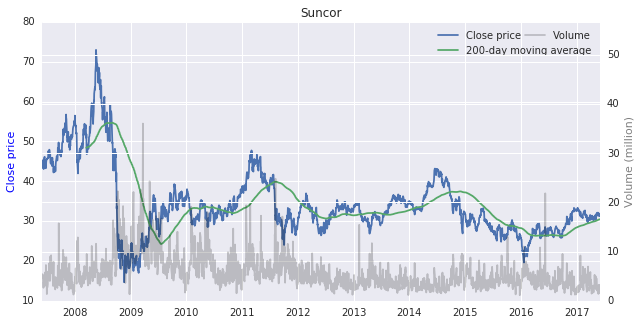

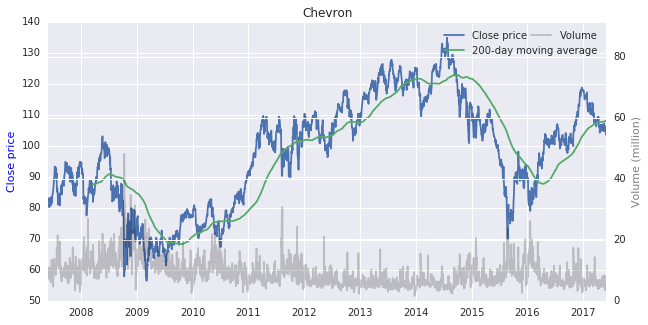

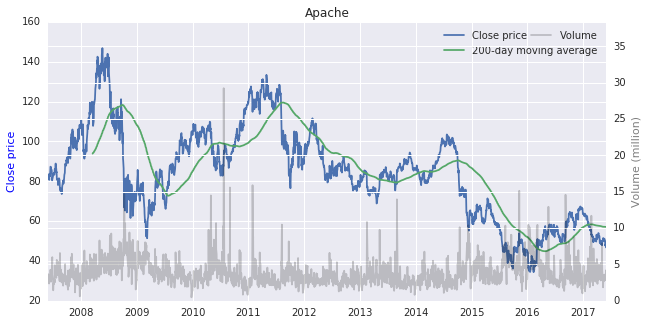

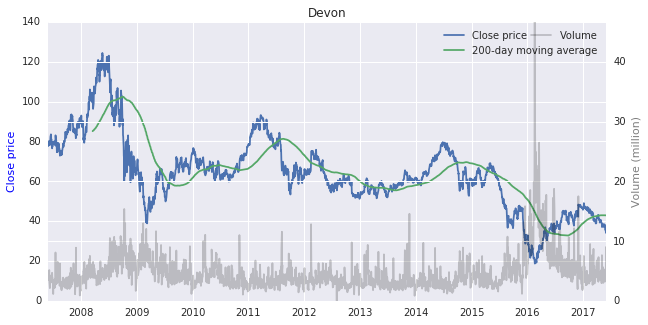

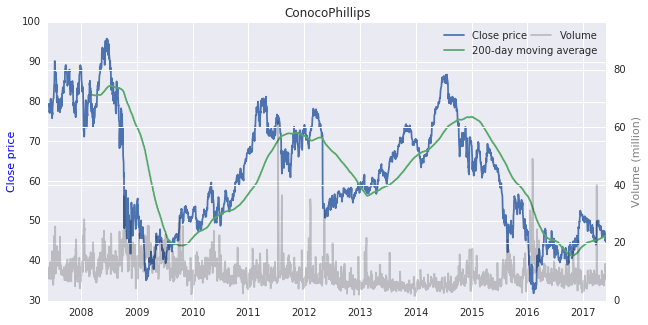

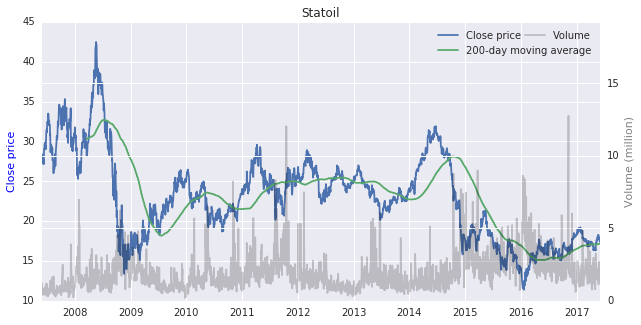

In [76]:
for i in range(0,len(tickers)):
    plot_stock_time(tickers[i])    
    plt.title(company_names[i])
    plt.show()

** Plot close price range for each stock using Seaborn **

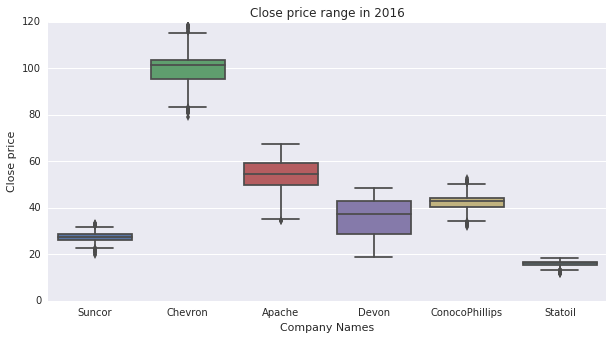

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
fig = sns.boxplot(data=oil_stocks.xs(key='Close',axis=1,level='Stock info').ix['2016-01-01':'2016-12-31'])
fig.set(xticklabels=company_names)
fig.set(xlabel='Company Names', ylabel='Close price',title='Close price range in 2016')
plt.show()

** Plot price distribution in 2016 to help visualize support/resistance **

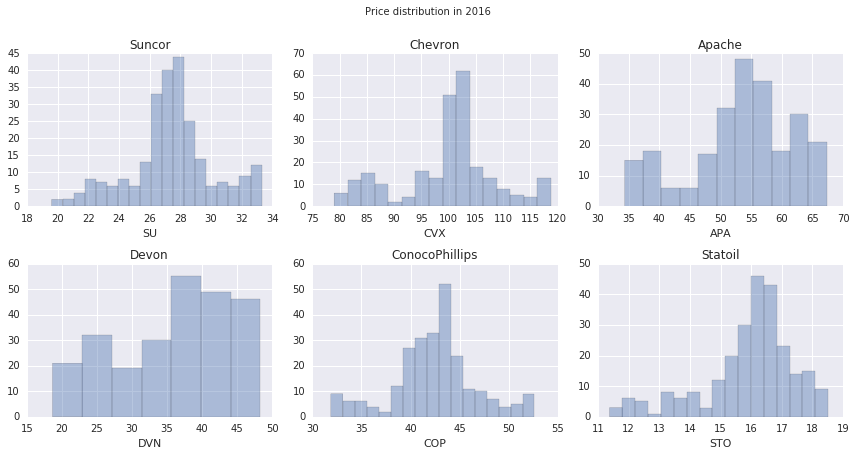

In [13]:
fig = plt.figure()
fig.set_size_inches(12, 6)
for i in range(0,len(tickers)):
    plt.subplot(2,3,i+1)
    ax = sns.distplot(oil_stocks.xs(key='Close',axis=1,level='Stock info')[tickers[i]]
                 .ix['2016-01-01':'2016-12-31'],kde=False)
    ax.set_title(company_names[i])
fig.suptitle('Price distribution in 2016',y=1.05)
plt.tight_layout()

** Compare perfermance of all 6 stocks in the time period **

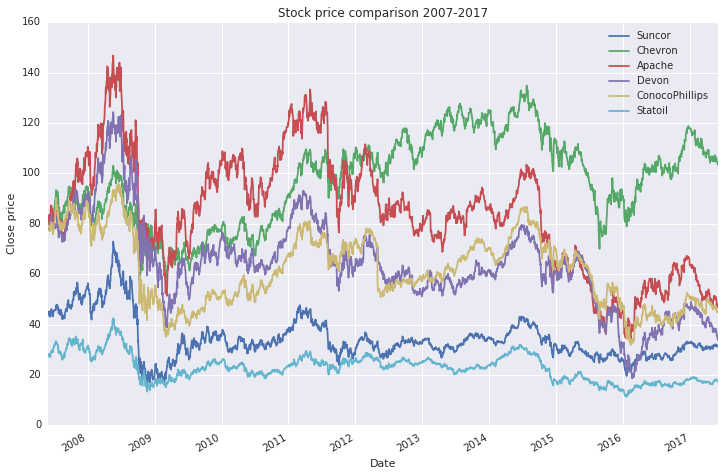

In [31]:
for i in range(0,len(tickers)):
    oil_stocks[tickers[i]]['Close'].plot(label= company_names[i],figsize=(12,8))
plt.ylabel('Close price')
plt.title('Stock price comparison 2007-2017')
plt.legend()
plt.show()

** Heatmap of the correlaton between the stocks ** 

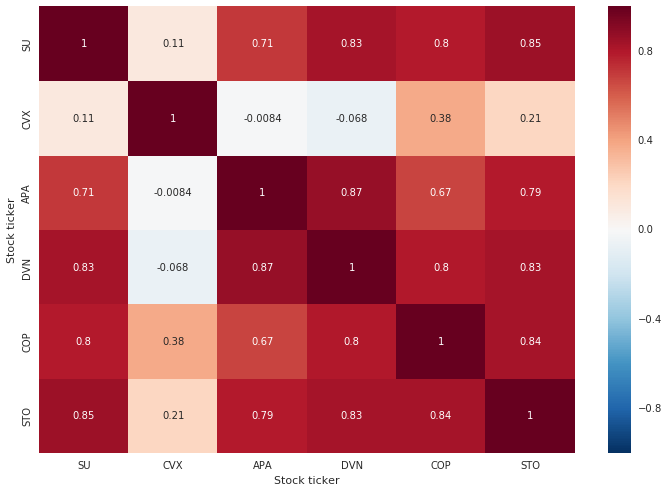

In [61]:
plt.figure(figsize=(12,8))
sns.heatmap(oil_stocks.xs(key='Close',axis=1,level='Stock info').corr(), annot=True)

** Cluster map of the correlaton between the stocks **

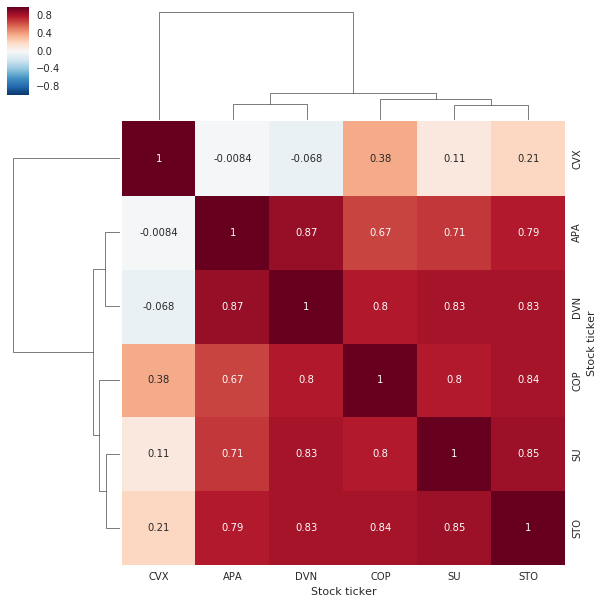

In [63]:
plt.figure(figsize=(15,10))
sns.clustermap(oil_stocks.xs(key='Close',axis=1,level='Stock info').corr(), annot=True)

** The plot above indicates the stock price of Chevron (CVX) is the least correlated to the rest. This can be verified by the previous price/time comparison plot as well. **